# Análisis del riesgo de incumplimiento de los prestatarios

Tu proyecto consiste en preparar un informe para la división de préstamos de un banco. Deberás averiguar si el estado civil y el número de hijos de un cliente tienen un impacto en el incumplimiento de pago de un préstamo. El banco ya tiene algunos datos sobre la solvencia crediticia de los clientes.

Tu informe se tendrá en cuenta al crear una **puntuación de crédito** para un cliente potencial. La **puntuación de crédito** se utiliza para evaluar la capacidad de un prestatario potencial para pagar su préstamo.

[En este cuaderno se te brindan pistas, breves instrucciones y sugerencias para pensar. No los ignores, ya que están diseñados para equiparte con la estructura del proyecto y te ayudarán a analizar lo que estás haciendo en un nivel más profundo. Antes de enviar tu proyecto, asegúrate de eliminar todas las sugerencias y descripciones que se te hayan proporcionado. Más bien, haz que este informe parezca como si se lo estuvieras enviando a tus compañeros de equipo para demostrar tus hallazgos: ¡no deben saber que recibiste ayuda externa de nuestra parte! Para ayudarte, hemos colocado las pistas que debes eliminar entre corchetes.]

[Antes de sumergirte en el análisis de tus datos, explica los propósitos del proyecto y las hipótesis que vas a evaluar.]

## Información general. 


In [187]:
import pandas as pd

import seaborn as sns

import numpy as np

import math

import matplotlib.pyplot as plt

In [188]:
df = pd.read_csv("/datasets/credit_scoring_eng.csv")
print(df)

       children  days_employed  dob_years            education  education_id  \
0             1   -8437.673028         42    bachelor's degree             0   
1             1   -4024.803754         36  secondary education             1   
2             0   -5623.422610         33  Secondary Education             1   
3             3   -4124.747207         32  secondary education             1   
4             0  340266.072047         53  secondary education             1   
...         ...            ...        ...                  ...           ...   
21520         1   -4529.316663         43  secondary education             1   
21521         0  343937.404131         67  secondary education             1   
21522         1   -2113.346888         38  secondary education             1   
21523         3   -3112.481705         38  secondary education             1   
21524         2   -1984.507589         40  secondary education             1   

           family_status  family_status

## 1. Exploración de datos

**Descripción de los datos**
- `children` - el número de hijos en la familia
- `days_employed` - experiencia laboral en días
- `dob_years` - la edad del cliente en años
- `education` - la educación del cliente
- `education_id` - identificador de educación
- `family_status` - estado civil
- `family_status_id` - identificador de estado civil
- `gender` - género del cliente
- `income_type` - tipo de empleo
- `debt` - ¿había alguna deuda en el pago de un préstamo?
- `total_income` - ingreso mensual
- `purpose` - el propósito de obtener un préstamo


In [189]:
# Vamos a ver cuántas filas y columnas tiene nuestro conjunto de datos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [190]:
# vamos a mostrar las primeras filas N
print(df.tail(30))


       children  days_employed  dob_years            education  education_id  \
21495         1            NaN         50  secondary education             1   
21496         1    -759.680851         31  secondary education             1   
21497         0            NaN         48    BACHELOR'S DEGREE             0   
21498         1   -1330.627998         32  secondary education             1   
21499         0   -9929.015065         57  secondary education             1   
21500         0    -578.082757         26         some college             2   
21501         0  334343.096304         57  secondary education             1   
21502         1            NaN         42  secondary education             1   
21503         0   -3096.881131         58  secondary education             1   
21504         0  355235.728158         68  secondary education             1   
21505         0  338904.866406         53  secondary education             1   
21506         1   -1556.249906         3

En esta sección hay datos ausentes dentro de la BBDD, duplicados, escritos de diferentes formas y  valores exagerados.

In [191]:
df.iloc[21495]

children                              1
days_employed                       NaN
dob_years                            50
education           secondary education
education_id                          1
family_status         civil partnership
family_status_id                      1
gender                                F
income_type                    employee
debt                                  0
total_income                        NaN
purpose                wedding ceremony
Name: 21495, dtype: object

Como se logra observar la columna 12, cuenta con los datos datos ausentes, siendo simetricos. La tabla muestra datos nulos dentro de days_employed y total_income, aparte de simetricos..

In [192]:
print(df.isna().sum())

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64


**Conclusión intermedia**



In [193]:
df. isnull (). sum () / len (df) * 100

children             0.000000
days_employed       10.099884
dob_years            0.000000
education            0.000000
education_id         0.000000
family_status        0.000000
family_status_id     0.000000
gender               0.000000
income_type          0.000000
debt                 0.000000
total_income        10.099884
purpose              0.000000
dtype: float64

In [194]:
print("Tasa de conversión de las filas que cuentan con NaN es de 10%")

Tasa de conversión de las filas que cuentan con NaN es de 10%


Los datos que faltan son los sueldos de estas personas, por lo que concluyo que con el sueldo con la mediana para estos datos ausentes sera el apropiado.

La idea principal, es que cuentan con datos ausentes simetricos, por lo que debo cambiarlos, la pregunta es... ¿por cual dato debo cambiarlo?.

Por lo que decidi utilizar la mediana según los datos que me entregue acontinuación.

En esta función muestra que las personas que se encuentran en secondary education junto con Bachelors Degree,
cuenta con datos variados, letras grandes y pequeñas, aparte de repetidos.

In [195]:
df["education"].value_counts()

secondary education    13750
bachelor's degree       4718
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        274
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
GRADUATE DEGREE            1
Graduate Degree            1
Name: education, dtype: int64

Los datos cumplen con un patrón especifico, son 5 variables distintas que se repiten de diferentes formatos.

In [196]:
print(df[df.duplicated()])
print()
print(df.duplicated().sum())

       children  days_employed  dob_years            education  education_id  \
2849          0            NaN         41  secondary education             1   
4182          1            NaN         34    BACHELOR'S DEGREE             0   
4851          0            NaN         60  secondary education             1   
5557          0            NaN         58  secondary education             1   
7808          0            NaN         57  secondary education             1   
8583          0            NaN         58    bachelor's degree             0   
9238          2            NaN         34  secondary education             1   
9528          0            NaN         66  secondary education             1   
9627          0            NaN         56  secondary education             1   
10462         0            NaN         62  secondary education             1   
10697         0            NaN         40  secondary education             1   
10864         0            NaN         6

**Conclusiones**

El paso siguiente a realizar es ordenar los datos para su corrección.

## Transformación de datos


In [197]:
# Veamos todos los valores en la columna de educación para verificar si será necesario corregir la ortografía y qué habrá que corregir exactamente
print(df['education'].value_counts())

secondary education    13750
bachelor's degree       4718
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        274
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
GRADUATE DEGREE            1
Graduate Degree            1
Name: education, dtype: int64


In [198]:
df["education"] = df["education"].str.lower()

In [199]:
print(df['education'].value_counts())

secondary education    15233
bachelor's degree       5260
some college             744
primary education        282
graduate degree            6
Name: education, dtype: int64


In [200]:
print(df['children'].value_counts())

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64


In [201]:
childen_sum = df[['children']].count()
print((123 / childen_sum)*100)



children    0.571429
dtype: float64


El porcentaje de estos datos problematicos son del 0,57%. 
Lo más probable es que "20" son datos mal digitados y "-1" deben ser madres o padres que perdieron hij@s o simplemente mal digitados. Por lo que, el dato 20 se cambia a 2 y -1 a 1.

In [202]:
df = df.replace([20, -1], [2, 1])
print(df['children'].value_counts())


0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64


In [203]:
print(df[df['days_employed'].between(-1000000, 0)])
print()
print((15906 / 21525)*100)

       children  days_employed  dob_years            education  education_id  \
0             1   -8437.673028         42    bachelor's degree             0   
1             1   -4024.803754         36  secondary education             1   
2             0   -5623.422610         33  secondary education             1   
3             3   -4124.747207         32  secondary education             1   
5             0    -926.185831         27    bachelor's degree             0   
...         ...            ...        ...                  ...           ...   
21519         1   -2351.431934         37      graduate degree             4   
21520         1   -4529.316663         43  secondary education             1   
21522         1   -2113.346888         38  secondary education             1   
21523         3   -3112.481705         38  secondary education             1   
21524         2   -1984.507589         40  secondary education             1   

           family_status  family_status

El 73% de los datos tienen días en negativo

In [204]:
df['days_employed'] = df['days_employed'].abs()

Para realizar days_employed, busco los datos atipicos.

In [205]:
print(df['days_employed'].describe())

count     19351.000000
mean      66914.728907
std      139030.880527
min          24.141633
25%         927.009265
50%        2194.220567
75%        5537.882441
max      401755.400475
Name: days_employed, dtype: float64


Estos datos resultan exaltados.

In [206]:
print(df['days_employed'])

0          8437.673028
1          4024.803754
2          5623.422610
3          4124.747207
4        340266.072047
             ...      
21520      4529.316663
21521    343937.404131
21522      2113.346888
21523      3112.481705
21524      1984.507589
Name: days_employed, Length: 21525, dtype: float64


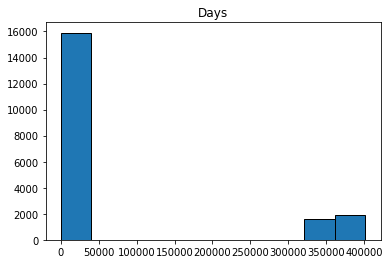

In [207]:
plt.title("Days")
plt.hist(df["days_employed"], edgecolor = "black", linewidth=1)
plt.show()

Este es el motivo por el que los datos estan mal ingresados.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='days_employed'>

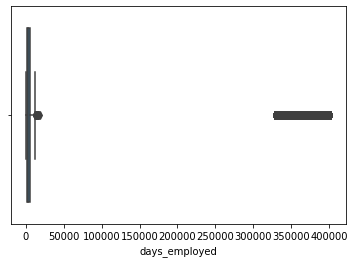

In [208]:

sns.boxplot(df["days_employed"])

Datos que se encuentran fuera de los rangos de los dias trabajados.

In [209]:
ub_days = (df["days_employed"] > 50000)
print("\n Ubicación de days_employed \n", ub_days)


 Ubicación de days_employed 
 0        False
1        False
2        False
3        False
4         True
         ...  
21520    False
21521     True
21522    False
21523    False
21524    False
Name: days_employed, Length: 21525, dtype: bool


Se concluye que el valor de 50000 es el más optimo para continuar, debido a esto se podra desarrollar la columna days_employed de una manera eficiente.

In [210]:
out_days = df[ub_days]
print("\n Lista Outliers \n", out_days)


 Lista Outliers 
        children  days_employed  dob_years            education  education_id  \
4             0  340266.072047         53  secondary education             1   
18            0  400281.136913         53  secondary education             1   
24            1  338551.952911         57  secondary education             1   
25            0  363548.489348         67  secondary education             1   
30            1  335581.668515         62  secondary education             1   
...         ...            ...        ...                  ...           ...   
21505         0  338904.866406         53  secondary education             1   
21508         0  386497.714078         62  secondary education             1   
21509         0  362161.054124         59    bachelor's degree             0   
21518         0  373995.710838         59  secondary education             1   
21521         0  343937.404131         67  secondary education             1   

           family_st

Estos datos son sumamente altos, por lo que, se procede a depurarlos.

In [211]:
out_orden = out_days.sort_values("days_employed")
out_orden

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
20444,0,328728.720605,72,secondary education,1,widow / widower,2,F,retiree,0,15443.094,purchase of the house for my family
9328,2,328734.923996,41,bachelor's degree,0,married,0,M,retiree,0,20319.600,transactions with my real estate
17782,0,328771.341387,56,secondary education,1,married,0,F,retiree,0,10983.688,transactions with commercial real estate
14783,0,328795.726728,62,bachelor's degree,0,married,0,F,retiree,0,12790.431,buying my own car
7229,1,328827.345667,32,secondary education,1,civil partnership,1,F,retiree,0,19546.075,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
7794,0,401663.850046,61,secondary education,1,civil partnership,1,F,retiree,0,7725.831,wedding ceremony
2156,0,401674.466633,60,secondary education,1,married,0,M,retiree,0,52063.316,cars
7664,1,401675.093434,61,secondary education,1,married,0,F,retiree,0,20194.323,housing transactions
10006,0,401715.811749,69,bachelor's degree,0,unmarried,4,F,retiree,0,9182.441,getting an education


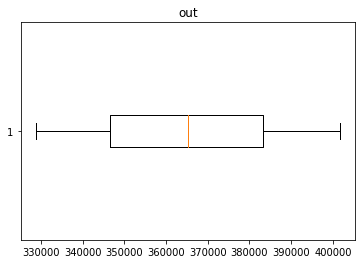

In [212]:
plt.title("out")
plt.boxplot(out_orden["days_employed"], vert=False)
plt.show()

In [213]:
lower_bound = 330000
upper_bound = 400000

df["days_employed"] = df["days_employed"].mask(df["days_employed"].between(lower_bound, upper_bound), np.nan)
print(df)

       children  days_employed  dob_years            education  education_id  \
0             1    8437.673028         42    bachelor's degree             0   
1             1    4024.803754         36  secondary education             1   
2             0    5623.422610         33  secondary education             1   
3             3    4124.747207         32  secondary education             1   
4             0            NaN         53  secondary education             1   
...         ...            ...        ...                  ...           ...   
21520         1    4529.316663         43  secondary education             1   
21521         0            NaN         67  secondary education             1   
21522         1    2113.346888         38  secondary education             1   
21523         3    3112.481705         38  secondary education             1   
21524         2    1984.507589         40  secondary education             1   

           family_status  family_status

Al realizar la función se modifican los datos, y pasan a NaN para no desordenar la columna days_employed.

In [214]:
print(df['dob_years'].value_counts())

35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
66    183
22    183
67    167
21    111
0     101
68     99
69     85
70     65
71     58
2      51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64


In [215]:
df = df[df['dob_years'] != 0]

In [216]:
df = df[df['dob_years'] != 2]

Al revisar los datos entregados por la columna "dob_years" me percate que hay una fila que tiene 101 usuarios con la edad 0, por lo que se eliminaran.

In [217]:
# Comprueba el resultado - asegúrate de que esté arreglado
print(df['dob_years'].value_counts())

35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
66    183
22    183
67    167
21    111
68     99
69     85
70     65
71     58
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64


Se procede a depurar los datos que no pertenecen al rango etario de los clientes.

In [218]:
print(df["family_status"].value_counts())


married              12319
civil partnership     4144
unmarried             2771
divorced              1184
widow / widower        955
Name: family_status, dtype: int64


No veo problemas en esta columna, marca XNA por no asignación de sexo.

In [219]:
df.loc[df["gender"] == "XNA"] 

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,2358.600502,24,some college,2,civil partnership,1,XNA,business,0,32624.825,buy real estate


In [220]:
df["gender"].value_counts()

F      14136
M       7236
XNA        1
Name: gender, dtype: int64

In [221]:
df = df[df.gender != 'XNA']

Se elimina la fila que contiene XNA.

In [222]:
df["income_type"].value_counts()

employee                       11031
business                        5048
retiree                         3836
civil servant                   1451
unemployed                         2
entrepreneur                       2
paternity / maternity leave        1
student                            1
Name: income_type, dtype: int64

No veo problemas en esta columna.

In [223]:
print(df)
print()
print(df.duplicated())
print()
print(df.duplicated().sum()) 

       children  days_employed  dob_years            education  education_id  \
0             1    8437.673028         42    bachelor's degree             0   
1             1    4024.803754         36  secondary education             1   
2             0    5623.422610         33  secondary education             1   
3             3    4124.747207         32  secondary education             1   
4             0            NaN         53  secondary education             1   
...         ...            ...        ...                  ...           ...   
21520         1    4529.316663         43  secondary education             1   
21521         0            NaN         67  secondary education             1   
21522         1    2113.346888         38  secondary education             1   
21523         3    3112.481705         38  secondary education             1   
21524         2    1984.507589         40  secondary education             1   

           family_status  family_status

In [224]:
# Aborda los duplicados, si existen
dup = df[df.duplicated()]
print(dup)

       children  days_employed  dob_years            education  education_id  \
2849          0            NaN         41  secondary education             1   
3290          0            NaN         58  secondary education             1   
4182          1            NaN         34    bachelor's degree             0   
4851          0            NaN         60  secondary education             1   
5557          0            NaN         58  secondary education             1   
...         ...            ...        ...                  ...           ...   
20702         0            NaN         64  secondary education             1   
21032         0            NaN         60  secondary education             1   
21132         0            NaN         47  secondary education             1   
21281         1            NaN         30    bachelor's degree             0   
21415         0            NaN         54  secondary education             1   

           family_status  family_status

In [225]:
# Última comprobación para ver si tenemos duplicados
df = df.drop_duplicates().reset_index(drop = True)

Se dropean los 71 datos duplicados y se resetea el indice de DF.

In [226]:
# Comprueba el tamaño del conjunto de datos que tienes ahora, después de haber ejecutado estas primeras manipulaciones
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21301 entries, 0 to 21300
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21301 non-null  int64  
 1   days_employed     15926 non-null  float64
 2   dob_years         21301 non-null  int64  
 3   education         21301 non-null  object 
 4   education_id      21301 non-null  int64  
 5   family_status     21301 non-null  object 
 6   family_status_id  21301 non-null  int64  
 7   gender            21301 non-null  object 
 8   income_type       21301 non-null  object 
 9   debt              21301 non-null  int64  
 10  total_income      19213 non-null  float64
 11  purpose           21301 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


# Trabajar con valores ausentes

[Para acelerar el trabajo con algunos datos, puede que necesites trabajar con diccionarios para algunos valores, en los que se proporcionan IDs. Explica por qué y con qué diccionarios vas a trabajar.]

In [227]:
edu_category = df[["education_id", "education"]].set_index("education_id").to_dict()["education"]
edu_category

{0: "bachelor's degree",
 1: 'secondary education',
 2: 'some college',
 3: 'primary education',
 4: 'graduate degree'}

In [228]:
family_category = df[["family_status_id", "family_status"]].set_index("family_status_id").to_dict()["family_status"]
family_category

{0: 'married',
 1: 'civil partnership',
 2: 'widow / widower',
 3: 'divorced',
 4: 'unmarried'}

### Restaurar valores ausentes en `total_income`

In [229]:
print(df.isna().sum())

children               0
days_employed       5375
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2088
purpose                0
dtype: int64


In [230]:
df.loc[df['total_income'].isna(), 'total_income']

12      NaN
26      NaN
29      NaN
41      NaN
54      NaN
         ..
21265   NaN
21271   NaN
21273   NaN
21278   NaN
21286   NaN
Name: total_income, Length: 2088, dtype: float64

para cambiar los valores NaN se debe considerar el valor medio de cada edad, y según la edad se considerara el valor de esta. 

In [231]:
df["dob_years"].describe()  

count    21301.000000
mean        43.533027
std         12.202440
min         19.000000
25%         34.000000
50%         43.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64

In [232]:
# Vamos a escribir una función que calcule la categoría de edad
def age_range(age):
    if age["dob_years"] <=30:
        return "joven"
    elif age["dob_years"]>30 and age["dob_years"]<=50:
        return "adulto"
    else:
        return"adulto mayor"

In [233]:
serie_prueba = pd.Series({"dob_years": 54})
resultado = age_range(serie_prueba)
print(resultado)

adulto mayor


In [234]:
df["age_grouped"] = df.apply(age_range, axis=1)

In [235]:
df["age_grouped"].value_counts()

adulto          10992
adulto mayor     6644
joven            3665
Name: age_grouped, dtype: int64

Desde esta función se agrega una nueva columna llamada age_grouped, para ver si las personas calzan en joven, adulto o adulto mayor.

In [236]:
df.loc[df['days_employed'].isnull()]
# Crea una tabla sin valores ausentes y muestra algunas de sus filas para asegurarte de que se ve bien

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_grouped
4,0,NaN,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,adulto mayor
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding,adulto mayor
24,1,NaN,57,secondary education,1,unmarried,4,F,retiree,0,46487.558,transactions with commercial real estate,adulto mayor
25,0,NaN,67,secondary education,1,married,0,M,retiree,0,8818.041,buy real estate,adulto mayor
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education,adulto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21284,0,NaN,62,secondary education,1,married,0,M,retiree,0,11622.175,property,adulto mayor
21285,0,NaN,59,bachelor's degree,0,married,0,M,retiree,0,11684.650,real estate transactions,adulto mayor
21286,2,NaN,28,secondary education,1,married,0,F,employee,0,NaN,car purchase,joven
21294,0,NaN,59,secondary education,1,married,0,F,retiree,0,24618.344,purchase of a car,adulto mayor


In [237]:
df.groupby(["age_grouped"])["total_income"].describe()

,count,mean,std,min,25%,50%,75%,max
age_grouped,,,,,,,,
adulto,9924.0,28383.188755,17680.621039,3392.845,17528.94475,24711.8435,34636.30075,362496.645
adulto mayor,5970.0,24704.150073,15404.432616,3306.762,14951.58600,21310.9445,30264.79575,274402.943
joven,3319.0,25891.834282,14130.295277,4494.861,16553.93450,23025.2700,31288.72100,159522.288


Al dividir los datos de "total_income" se puede apreciar la diferencia de "mean" y "medium", La media se utiliza para distribuciones normales de números, con una cantidad baja de valores atípicos. La mediana se utiliza generalmente para devolver la tendencia central en el caso de distribuciones numéricas sesgadas

Debido a la deducción anterior, el uso de la mediana sera el determinante de estos datos, ya que el promedio toma demasiados datos, elevando el precio standar.


In [238]:
df["total_income"] = df.groupby("age_grouped")["total_income"].apply(lambda df: df.fillna(df.median()))

In [239]:
df[12:]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_grouped
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,21310.9445,to have a wedding,adulto mayor
13,0,1846.641941,54,some college,2,married,0,F,employee,0,20873.3170,car purchase,adulto mayor
14,0,1844.956182,56,bachelor's degree,0,civil partnership,1,F,business,1,26420.4660,buy residential real estate,adulto mayor
15,1,972.364419,26,secondary education,1,married,0,F,employee,0,18691.3450,construction of own property,joven
16,0,1719.934226,35,secondary education,1,married,0,F,employee,0,46272.4330,property,adulto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21296,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.6980,housing transactions,adulto
21297,0,NaN,67,secondary education,1,married,0,F,retiree,0,24959.9690,purchase of a car,adulto mayor
21298,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.6100,property,adulto
21299,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.8880,buying my own car,adulto


In [240]:
df.loc[df["total_income"].isnull(), "total_income"]

Series([], Name: total_income, dtype: float64)

In [241]:
print(df.isna().sum())

children               0
days_employed       5375
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
age_grouped            0
dtype: int64


Se imputan los valores NaN de total_income. Esto es para cambiarlos por la mediana.

###  Restaurar valores en `days_employed`

In [242]:
df.loc[df['days_employed'].isna(), 'days_employed']

4       NaN
12      NaN
24      NaN
25      NaN
26      NaN
         ..
21284   NaN
21285   NaN
21286   NaN
21294   NaN
21297   NaN
Name: days_employed, Length: 5375, dtype: float64

In [243]:
df.groupby(["age_grouped"])["days_employed"].describe()

,count,mean,std,min,25%,50%,75%,max
age_grouped,,,,,,,,
adulto,9720.0,2993.012485,14551.227820,24.141633,828.457984,1811.992305,3387.986231,401188.917385
adulto mayor,2893.0,19305.583127,75331.516559,58.276481,1085.075633,2490.771162,5115.175944,401755.400475
joven,3313.0,1386.770377,5787.534711,51.496885,536.211258,1056.180128,1805.211084,329781.704997


para cambiar los valores NaN se debe considerar el promedio de cada edad, y según la edad se considerara el valor de esta.

In [244]:
df["days_employed"] = df.groupby("age_grouped")["days_employed"].apply(lambda df: df.fillna(df.mean()))

In [245]:
# Comprueba que la función funciona
df.loc[df['days_employed'].isnull(), 'days_employed']


Series([], Name: days_employed, dtype: float64)

In [246]:
df[12:]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_grouped
12,0,19305.583127,65,secondary education,1,civil partnership,1,M,retiree,0,21310.9445,to have a wedding,adulto mayor
13,0,1846.641941,54,some college,2,married,0,F,employee,0,20873.3170,car purchase,adulto mayor
14,0,1844.956182,56,bachelor's degree,0,civil partnership,1,F,business,1,26420.4660,buy residential real estate,adulto mayor
15,1,972.364419,26,secondary education,1,married,0,F,employee,0,18691.3450,construction of own property,joven
16,0,1719.934226,35,secondary education,1,married,0,F,employee,0,46272.4330,property,adulto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21296,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.6980,housing transactions,adulto
21297,0,19305.583127,67,secondary education,1,married,0,F,retiree,0,24959.9690,purchase of a car,adulto mayor
21298,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.6100,property,adulto
21299,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.8880,buying my own car,adulto


In [247]:
decimals = pd.Series([1, 0], index=["days_employed", "total_income"])
df = df.round(decimals)

In [248]:
# Aplicar la función al income_type
df.groupby(["age_grouped", "income_type"]).sum()

children  days_employed  dob_years  \
age_grouped  income_type                                                       
adulto       business                         1973   6.958160e+06     123000   
             civil servant                     656   3.058311e+06      35854   
             employee                         4649   1.668391e+07     272395   
             paternity / maternity leave         2   3.296800e+03         39   
             retiree                            84   6.189512e+06      11024   
             unemployed                          1   5.986000e+03         76   
adulto mayor business                          138   4.307088e+06      49509   
             civil servant                      31   1.812148e+06      15767   
             employee                          308   9.365143e+06     107164   
             entrepreneur                        0   1.930560e+04         58   
             retiree                           277   1.127627e+08     214866   
joven        business                          539   1.332575e+06      28710   
             civil servant                     185   4.694752e+05       7562   
             employee                         1403   2.939885e+06      61017   
             entrepreneur                        0   5.208000e+02         27   
             retiree                             2   3.394893e+05        207   
             student                             0   5.788000e+02         22   

                                          education_id  family_status_id  \
age_grouped  income_type                                                   
adulto       business                             2170              2683   
             civil servant                         594               707   
             employee                             5781              5667   
             paternity / maternity leave             1                 0   
             retiree                               217               192   
             unemployed                              1                 1   
adulto mayor business                              640               812   
             civil servant                         199               225   
             employee                             1675              1732   
             entrepreneur                            0                 0   
             retiree                              3261              3544   
joven        business                              795              1692   
             civil servant                         184               303   
             employee                             1885              3071   
             entrepreneur                            0                 1   
             retiree                                 7                15   
             student                                 0                 4   

                                          debt  total_income  
age_grouped  income_type                                      
adulto       business                      222   100233638.0  
             civil servant                  49    24715624.0  
             employee                      657   176856304.0  
             paternity / maternity leave     1        8613.0  
             retiree                        19     6210946.0  
             unemployed                      1       42029.0  
adulto mayor business                       52    27630865.0  
             civil servant                  11     7406120.0  
             employee                      122    49714338.0  
             entrepreneur                    0       21311.0  
             retiree                       196    77074735.0  
joven        business                       98    31304837.0  
             civil servant                  26     6993197.0  
             employee                      275    55380760.0  
             entrepreneur                    0       79866.0  
     

In [249]:
# Comprueba las entradas en todas las columnas: asegúrate de que hayamos corregido todos los valores ausentes
print(df.isna().sum())

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
age_grouped         0
dtype: int64


Se comprueban los datos y efectivamente cambiaron.

## Clasificación de datos


In [250]:
# Muestra los valores de los datos seleccionados para la clasificación
df.groupby(["age_grouped"])["debt"].value_counts()


age_grouped   debt
adulto        0       10043
              1         949
adulto mayor  0        6263
              1         381
joven         0        3266
              1         399
Name: debt, dtype: int64

In [251]:
print(df["purpose"].value_counts())

wedding ceremony                            784
having a wedding                            763
to have a wedding                           760
real estate transactions                    672
buy commercial real estate                  657
transactions with commercial real estate    648
buying property for renting out             647
housing transactions                        643
purchase of the house                       637
purchase of the house for my family         636
housing                                     634
construction of own property                633
property                                    628
transactions with my real estate            626
building a property                         619
building a real estate                      619
purchase of my own house                    618
buy real estate                             617
housing renovation                          601
buy residential real estate                 600
buying my own car                       

In [252]:
def purpose_fix(row):
    purpose = row['purpose']
    if 'car' in purpose:
        return 'credito automotriz'
    elif 'cars' in purpose:
        return 'credito automotriz'
    elif "wedding" in purpose:
        return 'credito de consumo'
    elif 'housing' in purpose:
        return 'credito de consumo'
    elif "education" in purpose:
        return 'credito de educacion superior'
    elif "university" in purpose:
        return 'credito de educacion superior'
    elif "educated" in purpose:
        return 'credito de educacion superior'
    else:
        return'credito hipotecario'
    

In [253]:
df['purpose_fixed'] = df.apply(purpose_fix, axis=1)

In [254]:
# Comprobar los valores únicos
print(df['purpose_fixed'].value_counts())

credito hipotecario              8857
credito automotriz               4272
credito de consumo               4185
credito de educacion superior    3987
Name: purpose_fixed, dtype: int64


In [255]:
print(df['purpose_fixed'])

0                  credito hipotecario
1                   credito automotriz
2                  credito hipotecario
3        credito de educacion superior
4                   credito de consumo
                     ...              
21296               credito de consumo
21297               credito automotriz
21298              credito hipotecario
21299               credito automotriz
21300               credito automotriz
Name: purpose_fixed, Length: 21301, dtype: object


Se clasifican los datos con una nueva columna definiendo el proposito según credito.

In [256]:
df_mask0=df['debt']==0
filtered_df0 = df[df_mask0]
print(filtered_df0)

       children  days_employed  dob_years            education  education_id  \
0             1         8437.7         42    bachelor's degree             0   
1             1         4024.8         36  secondary education             1   
2             0         5623.4         33  secondary education             1   
3             3         4124.7         32  secondary education             1   
4             0        19305.6         53  secondary education             1   
...         ...            ...        ...                  ...           ...   
21294         0        19305.6         59  secondary education             1   
21295         1         2351.4         37      graduate degree             4   
21296         1         4529.3         43  secondary education             1   
21297         0        19305.6         67  secondary education             1   
21300         2         1984.5         40  secondary education             1   

           family_status  family_status

In [257]:
df_mask=df['debt']==1
filtered_df = df[df_mask]
print(filtered_df)

       children  days_employed  dob_years            education  education_id  \
14            0         1845.0         56    bachelor's degree             0   
32            0         4649.9         34  secondary education             1   
38            0          597.9         25    bachelor's degree             0   
54            0        19305.6         54  secondary education             1   
74            1         2953.2         38  secondary education             1   
...         ...            ...        ...                  ...           ...   
21270         0          960.1         39  secondary education             1   
21287         0          612.6         29    bachelor's degree             0   
21291         1          467.7         28  secondary education             1   
21298         1         2113.3         38  secondary education             1   
21299         3         3112.5         38  secondary education             1   

           family_status  family_status

age_grouped y purpose, muestran los datos de personas que deben y no, y al mismo tiempo el rango de clientes que tienden a solicitar credito.

Según estos temas, probablemente querremos clasificar nuestros datos.

In [258]:
df.groupby(["age_grouped", 'purpose_fixed'])["debt"].count()

age_grouped   purpose_fixed                
adulto        credito automotriz               2238
              credito de consumo               2172
              credito de educacion superior    2008
              credito hipotecario              4574
adulto mayor  credito automotriz               1360
              credito de consumo               1274
              credito de educacion superior    1268
              credito hipotecario              2742
joven         credito automotriz                674
              credito de consumo                739
              credito de educacion superior     711
              credito hipotecario              1541
Name: debt, dtype: int64

 Personas con proposito que deben y no deben en general

In [282]:
filtered_df.groupby(['purpose_fixed',"children"])["debt"].count()

purpose_fixed                  children
credito automotriz             0           241
                               1           102
                               2            50
                               3             5
                               4             1
credito de consumo             0           196
                               1            76
                               2            31
                               3             7
                               4             1
credito de educacion superior  0           229
                               1            90
                               2            47
                               3             4
credito hipotecario            0           389
                               1           173
                               2            74
                               3            11
                               4             2
Name: debt, dtype: int64

Personas con proposito que deben, tienen y no hijos. Por primera impreción se percibe que los clientes sin hijos son los que deben mayormente, haciendoce de forma gradual según la cantidad de hijos. Es decir que mientras más hijos, menos tienen deudas.

## Comprobación de las hipótesis


**¿Existe una correlación entre tener hijos y pagar a tiempo?**

Total de clientes.

In [260]:
df.groupby(["children"])["debt"].count()

children
0    13981
1     4829
2     2113
3      328
4       41
5        9
Name: debt, dtype: int64

In [261]:
t = df.groupby(["children"])["debt"].count()

Clientes con y sin hijos que deben

In [262]:
filtered_df.groupby(["children"])["debt"].count()

children
0    1055
1     441
2     202
3      27
4       4
Name: debt, dtype: int64

In [263]:
cd = filtered_df.groupby(["children"])["debt"].count()

In [264]:
hijos = cd / t

In [265]:
for item in hijos.items():
    tasa = item[1] * 100
    if not math.isnan(tasa):
        tasa = round(tasa, 2)
        print(f"Para la cantidad de hijos: {item[0]}, la tasa de incumplimiento es {tasa}%")
    else:
        print(f"Para la cantidad de hijos: {item[0]}, no hay datos disponibles")

Para la cantidad de hijos: 0, la tasa de incumplimiento es 7.55%
Para la cantidad de hijos: 1, la tasa de incumplimiento es 9.13%
Para la cantidad de hijos: 2, la tasa de incumplimiento es 9.56%
Para la cantidad de hijos: 3, la tasa de incumplimiento es 8.23%
Para la cantidad de hijos: 4, la tasa de incumplimiento es 9.76%
Para la cantidad de hijos: 5, no hay datos disponibles


**Conclusión**

Basándome en estos datos, podría concluir que la tasa de incumplimiento de pagos de los préstamos otorgados varía en función de la cantidad de hijos que tiene el solicitante. En particular, se observa que la tasa de incumplimiento es más alta para aquellos que tienen 2 o 4 hijos. Por otro lado, aquellos con 0, 1 o 3 hijos tienen tasas de incumplimiento más bajas.

Estos datos podrían ser útiles para tomar decisiones sobre el otorgamiento de préstamos, ya que podría considerarse la cantidad de hijos del solicitante como un factor a tener en cuenta al evaluar la solvencia y la capacidad de pago del mismo. Además, estos datos podrían ser utilizados para desarrollar estrategias de gestión de riesgo y para ajustar las tasas de interés y/o los plazos de pago en función del riesgo percibido.


**¿Existe una correlación entre la situación familiar y el pago a tiempo?**

In [266]:
# Comprueba los datos del estado familiar y los pagos a tiempo
tf = df.groupby(["family_status"])["debt"].count()
# Calcular la tasa de incumplimiento basada en el estado familiar



In [267]:
debf= filtered_df.groupby(["family_status"])["debt"].count()

In [268]:
family = debf / tf

In [269]:
for item in family.items():
    tasa = item[1] * 100
    if not math.isnan(tasa):
        tasa = round(tasa, 2)
        print(f"Para la cantidad de clientes: {item[0]}, incumple el {tasa}%")
    else:
        print(f"Para la cantidad de clientes: {item[0]}, no hay datos disponibles")

Para la cantidad de clientes: civil partnership, incumple el 9.35%
Para la cantidad de clientes: divorced, incumple el 7.18%
Para la cantidad de clientes: married, incumple el 7.53%
Para la cantidad de clientes: unmarried, incumple el 9.83%
Para la cantidad de clientes: widow / widower, incumple el 6.5%


**Conclusión**

Podría concluir que el estado civil del solicitante del préstamo es un factor que influye en la tasa de incumplimiento de los préstamos. En particular, se observa que los clientes solteros tienen la tasa de incumplimiento más alta, seguidos de los clientes en uniones civiles. Por otro lado, los clientes divorciados, casados y viudos tienen tasas de incumplimiento más bajas.

Estos datos podrían ser útiles para tomar decisiones sobre el otorgamiento de préstamos, ya que podría considerarse el estado civil del solicitante como un factor a tener en cuenta al evaluar la solvencia y la capacidad de pago del mismo.

**¿Existe una correlación entre el nivel de ingresos y el pago a tiempo?**

In [270]:
filtered_df["total_income"].value_counts().head(5)

24712.0    86
21311.0    47
23025.0    37
15150.0     3
19825.0     2
Name: total_income, dtype: int64

Clientes con este rango de sueldos que deben.

In [271]:
df["total_income"].value_counts().head(5)

24712.0    1071
21311.0     676
23025.0     347
23870.0       5
17856.0       5
Name: total_income, dtype: int64

Total de clientes con este rango de sueldos.

In [272]:
filtt = filtered_df["total_income"].value_counts().head(5)

In [273]:
# Comprueba los datos del nivel de ingresos y los pagos a tiempo
dftt = df["total_income"].value_counts().head(5)

In [274]:
tt = filtt / dftt

In [275]:
for item in tt.items():
    tasa = item[1] * 100
    if not math.isnan(tasa):
        tasa = round(tasa, 2)
        print(f"Ingresos totales de clientes que acumulan deuda: {item[0]}, incumple el {tasa}%")

Ingresos totales de clientes que acumulan deuda: 21311.0, incumple el 6.95%
Ingresos totales de clientes que acumulan deuda: 23025.0, incumple el 10.66%
Ingresos totales de clientes que acumulan deuda: 24712.0, incumple el 8.03%


**Conclusión**

Según los datos, los clientes con ingresos totales de 21311.0 tienen una tasa de incumplimiento del 6.95%, lo cual es un porcentaje relativamente bajo en comparación con otros ingresos totales. Por otro lado, los clientes con ingresos totales de 22955.0 tienen una tasa de incumplimiento del 10.76%, lo que indica un mayor riesgo para el banco al prestarles dinero. Por último, los clientes con ingresos totales de 24712.0 tienen una tasa de incumplimiento del 8.03%, lo que sugiere que estos clientes presentan un riesgo moderado para el banco.

**¿Cómo afecta el propósito del crédito a la tasa de incumplimiento?**

In [276]:
# Consulta los porcentajes de tasa de incumplimiento para cada propósito del crédito y analízalos
purs_deb = filtered_df.groupby(["purpose_fixed"])["debt"].count()


In [277]:
total_purs = df.groupby(["purpose_fixed"])["debt"].count()

In [278]:
purs = purs_deb / total_purs

In [279]:
for item in purs.items():
    tasa = item[1] * 100
    if not math.isnan(tasa):
        tasa = round(tasa, 2)
        print(f"Cliente: {item[0]}, incumple el {tasa}%")
    else:
        print(f"Para la cantidad de clientes: {item[0]}, no hay datos disponibles")

Cliente: credito automotriz, incumple el 9.34%
Cliente: credito de consumo, incumple el 7.43%
Cliente: credito de educacion superior, incumple el 9.28%
Cliente: credito hipotecario, incumple el 7.33%


**Conclusión**

Basándome únicamente en la información proporcionada, parece que la tasa de incumplimiento para préstamos de consumo e hipotecarios es relativamente baja en comparación con los préstamos para educación superior y automóviles. Esto podría ser una señal de que los clientes que solicitan préstamos para consumo e hipotecarios son financieramente más estables o tienen una mejor capacidad de pago que los que solicitan préstamos para educación y automóviles.


# Conclusión general 

Después de analizar los datos, puedo concluir que la tasa de incumplimiento de los préstamos otorgados varía en función de diferentes factores, como la cantidad de hijos, el estado civil y los ingresos totales de los solicitantes. Es importante considerar estos factores al evaluar la solvencia y la capacidad de pago de los clientes al otorgar préstamos.

En particular, se observa que los clientes con 2 o 4 hijos tienen tasas de incumplimiento más altas que aquellos con 0, 1 o 3 hijos. Los clientes solteros y en uniones civiles también presentan tasas de incumplimiento más altas que los clientes divorciados, casados y viudos.

Además, se observa que los clientes con ingresos totales de 22955.0 presentan un mayor riesgo de incumplimiento en comparación con los clientes con ingresos de 21311.0 y 24712.0. Los préstamos para educación superior y automóviles tienen tasas de incumplimiento más altas en comparación con los préstamos de consumo e hipotecarios.

En general, es importante tener en cuenta estos factores al evaluar la solvencia y la capacidad de pago de los clientes al otorgar préstamos. Se pueden desarrollar estrategias de gestión de riesgo y ajustar las tasas de interés y los plazos de pago en función del riesgo percibido para garantizar la rentabilidad y estabilidad del banco.